<div style="background-color: #e6f7ff; padding: 20px; border-radius: 10px; text-align: center; border: 1px solid #b3e0ff;">
    <h1 style="font-size: 2.5em; margin-bottom: 10px; color: #005580;">Project 1</h1>
    <h2 style="font-size: 2em; font-weight: normal; color: #007acc;">(Write Here: Mariam Fahs)</h2>
</div>

## How life burns your pockets during medical emergency?

This project is mainly focussed on **Storytelling** from a small dataset. The main aim of the project is to bring out the fun of data exploration and clustering techniques in a small dataset.

The data set is sourced from Kaggle and it seems like a abridged version of some insurance company's database. The main aim of the project with the data is to find the cost's dependencies of factors like BMI or body mass index, smoking habits, age and no of childrens and also roughly touches on the average spendings of males and females based on the above mentioned factors.

So without much ado lets begin the project by importing some of our dependencies. Following a brief description and their need in this project:-
1. OS: for file navigation from storage devices
2. Numpy for array and calculations
3. Pandas for data management including dataframes and series
4. Matplotlib and its subordinates like Pyplot, and Style
5. Sklearns StandardScaler for Data scaling
6. Sklearns KMeans, DBSCAN, and Agglomerative for clustering
7. Sklearns Silhouette_Samples and Silhouette_score are for calculating silhouette scores for each individual and whole data set respectively.

Note: we suggest creating an environment variable for your project, where you install all the needed dependencies. You can use the Anaconda navigator, or you can create one using the terminal.

In [84]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MaxNLocator
# from statsmodels.formula.api import ols

### 1. Data Insites

In [2]:
# Download the dataset from the Github repository of the course. 

path="./insurance.csv"

#### 1.1 Use pandas to load the CSV file [2 Points]
Store the dataframe in a variable named 'raw_data'

In [3]:
# <write your code here>
raw_data = pd.read_csv(path)

#### 1.2 Extract more info from the dataset (hint: use .info()) [2 Points]

In [4]:
# <write your code here>
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


 More overview of the data are follows: we have around 3 object variables and 4 continuous variables and all the categories are non-null.

#### 1.3 Drop the categorical variables so we can extract some insights from the continious variables. [2 Points]
Store the new dataframe in a variable named 'raw_data_c'

Use the describe() function to plot some statistics from the extracted data

In [5]:
# <write your code here>
raw_data_c = raw_data.drop(['sex', 'smoker', 'region'], axis=1)
raw_data_c.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From the desription of data we find, except *Charges*, other features don't have much **outliers**

#### 1.4 Check if there is any null values from the whole dataset (i.e. using raw_data) [2 Points]

In [6]:
# <write your code here>
raw_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 2. Data Visualization and Analysis

**Basic Histogram**

*To find the nature of data*

The basic histogram, called by the **hist()** function gives a visual represention of the distribution of the data based on the *Normal distribution*. From this graph we can understand:-
1. Data type of each variable: "Continuous variables" will have a continuous normal distribution curve. "Categorical variable" will have distinct plots.
2. Skewness of data highlights the presence of **outliers**.


#### 2.1 Create Histograms [2 Points]

Your task is to create four histograms for the following features: age, bmi, charges, and region.

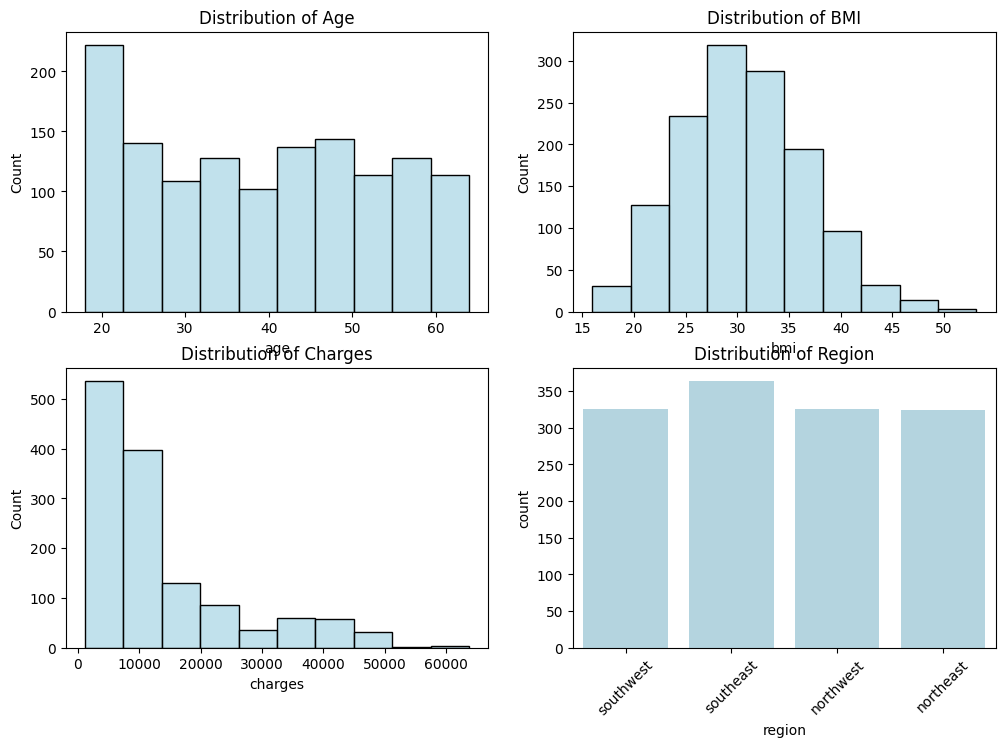

In [17]:
# <write your code here>
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
sns.histplot(raw_data['age'], bins=10, color='lightblue')
plt.title("Distribution of Age")   

plt.subplot(2, 2, 2)
sns.histplot(raw_data['bmi'], bins=10, color='lightblue')
plt.title("Distribution of BMI")

plt.subplot(2, 2, 3)
sns.histplot(raw_data['charges'], bins=10, color='lightblue')
plt.title("Distribution of Charges")

plt.subplot(2, 2, 4)
sns.countplot(x=raw_data['region'], color='lightblue')
plt.title("Distribution of Region")
plt.xticks(rotation=45)

plt.show()

#### 2.2 Get the correlation matrix on the numerical features (i.e. raw_data_c) [3 Points]

In [20]:
# <write your code here>
cm = raw_data_c.corr()
cm

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#### 2.3 Create the correlation plot [3 Points]

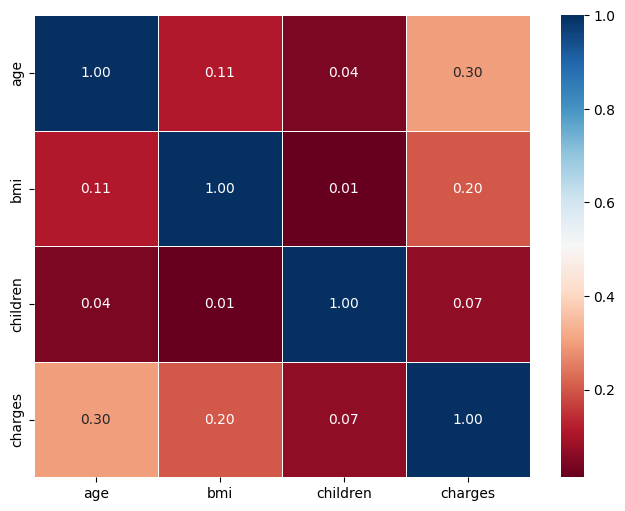

In [23]:
# <write your code here>
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.show()

what is your analysis based on the resulting plot?

**write your answer here**

Age and charges have a +ve week corr of 0.3 as the highest corr (still week) and thats logical as medical costs depends more on health conditions rather than just age

As for the others, they have +ve very week corr as charges don't realy deppends on wether u have chilren or not. 

However the corr btwn bmi and charges is not that logical assuming that the higher bmi leads to more health issues -> higher medical cost

but as we didnt include smoking and region that must have a strong corr maybe thats why it was weak 

**Relationship between Age and Charges.**

#### 2.4 Convert age into bins/groups [3 Points]

Your task here is to first convert the age into bins/groups of categorical variables like Young Adult (17 < age <= 30), Adult (age <= 59) and Old (age > 59) to analyse its relationship with medical expenses "charges". Store the updated age column into 'age_cat'.

In [31]:
# <write your code here>
raw_data["age_cat"] = ''

for i, age in enumerate(raw_data["age"]):
    if 17 < age <= 30:
        raw_data.loc[i, "age_cat"] = 'Young Adult'
    elif age <= 59:
        raw_data.loc[i, "age_cat"] = 'Adult'
    else: 
        raw_data.loc[i, "age_cat"] = 'Old'

raw_data

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Adult
4,32,male,28.880,0,no,northwest,3866.85520,Adult
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult


#### 2.5 Count the unique values of age_cat features [3 Points]

In [32]:
# <write your code here>
age_cat_counts = raw_data['age_cat'].value_counts()
age_cat_counts

age_cat
Adult          780
Young Adult    444
Old            114
Name: count, dtype: int64

#### 2.6 Create a pie chart showing the percentage distribution of each of the three age groups (hint: use pie() of the matplotlib) [3 Points]

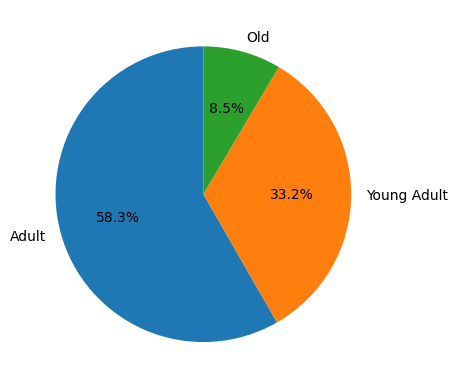

In [33]:
plt.pie(age_cat_counts, labels=age_cat_counts.index, autopct='%1.1f%%', startangle=90 )
plt.show()

**what do you conclude based on the obtained pie chart?**

write your answer here
A large majority of the data falss within the "Adults" category and around one-third falls under "Young Adults" while "Old" is nonly 8.5%  wich is a small group

so the dataset is strongly skewed tower adults.

#### 2.7 Convert the charges to log scale (hint: use np.log()) [3 Points]

We have seen that charges have outliers so we do a log transformation of charges to get rid of the impact of outliers.

In [35]:
# <write your code here>
raw_data["log_charges"] = ''

for i, charge in enumerate(raw_data["charges"]):
    raw_data.loc[i, "log_charges"] = np.log(charge)

raw_data

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult,9.268661
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,7.698927
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,7.396233
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,7.604867


#### 2.7 Plot the change of the charges (original vs log scale) using the hist() function [3 Points]

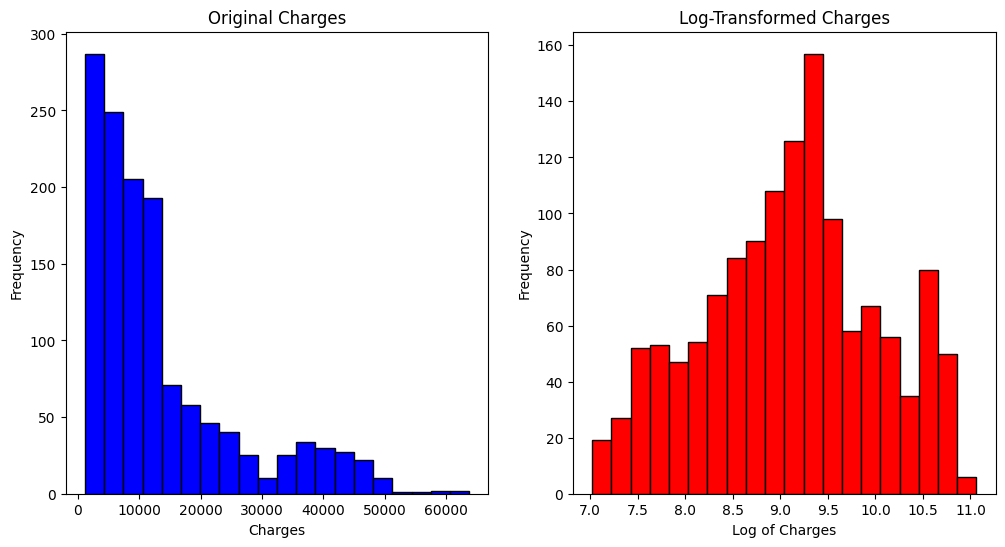

In [37]:
# <write your code here>
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.hist(raw_data["charges"], bins = 20, color='blue', edgecolor = 'black')
plt.title('Original Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(raw_data["log_charges"], bins = 20, color='red' , edgecolor = 'black')
plt.title('Log-Transformed Charges')
plt.xlabel('Log of Charges')
plt.ylabel('Frequency')
plt.show()

#### 2.8 Convert BMI To Categorical [3 Points]

Your task here is to convert the BMI feature into bins/groups. Therefore, we will count on the age ranges to create a new feature named 'bmi_cat', that hold the following values based on the age: 

1. age < 19: bmi_cat = Underweight
2. 19 <= age <= 25: bmi_cat = Normal
3. 25 < age <= 30: bmi_cat = Overweight
4. age > 30: bmi_cat = Obese

(hint: use the loc() of pandas. Example: raw_data.loc[(raw_data.age<19), "bmi_cat"]="Underweight")

In [38]:
raw_data["bmi_cat"] = ''

for i, age in enumerate(raw_data["age"]):
    if age < 19:
        raw_data.loc[i, "bmi_cat"] = "Underweight" 
    elif 19 <= age <= 25:
        raw_data.loc[i, "bmi_cat"] = "Normal"
    elif 25 < age <= 30:
        raw_data.loc[i, "bmi_cat"] = "Overweight"
    else:
        raw_data.loc[i, "bmi_cat"] = "Obese" 

raw_data

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges,bmi_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176,Normal
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302,Underweight
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538,Overweight
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092,Obese
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197,Obese
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult,9.268661,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,7.698927,Underweight
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,7.396233,Underweight
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,7.604867,Normal


#### 2.9 Plot a Bar plot for the distribution of the obtained bmi_cat categories (hint: get the unique values of each category and pass them to the bar() function) [3 Points]

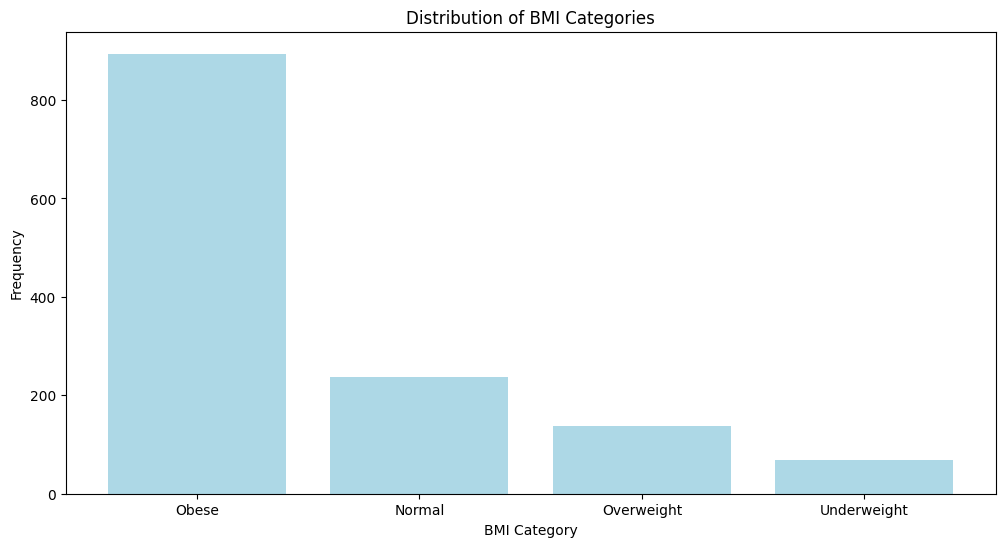

In [43]:
# <write your code here>
bmi_cat_count = raw_data["bmi_cat"].value_counts()
plt.figure(figsize=(12, 6))

plt.bar(bmi_cat_count.index,bmi_cat_count.values, color="lightblue")
plt.xlabel('BMI Category')
plt.ylabel('Frequency')
plt.title('Distribution of BMI Categories')
plt.show()

### Standardization of Data

Standard scaling is required to bring all the variables to the same page. *BMI* and *Age* range in tens where as *Children* range in once while *Charges* ranged in 5 digits. Thus to keep all on same page we use the standard scaler.

Standardize features by removing the mean and scaling to unit variance

$$z=(x-u)/sd$$

#### 2.10 Use the StandardScaler to scale the raw_data_c that includes (age, bmi, children, and charges) [3 Points]
Store the scaled data into variable: 'raw_data_std'

In [63]:
# <write your code here>
scaler = StandardScaler()
raw_data_std = scaler.fit_transform(raw_data_c)

raw_data_std

array([[-1.43876426, -0.45332   , -0.90861367,  0.2985838 ],
       [-1.50996545,  0.5096211 , -0.07876719, -0.95368917],
       [-0.79795355,  0.38330685,  1.58092576, -0.72867467],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, -0.96159623],
       [-1.29636188, -0.79781341, -0.90861367, -0.93036151],
       [ 1.55168573, -0.26138796, -0.90861367,  1.31105347]])

### 3. KMeans Clustering 

Using KMeans and Silhoutte scores

To find the best number of cluster (n_clusters=k) we run a for-loop and compute the WSS (Within sum of squares) Elbow method and Silhoutte scores for each "k".

**We will rely on bmi and charges to perform clustering**

**Here is how we get the data**

In [64]:
bmi_charg_c=raw_data_std[:,[1,3]]
print(bmi_charg_c)
print(bmi_charg_c.shape)

[[-0.45332     0.2985838 ]
 [ 0.5096211  -0.95368917]
 [ 0.38330685 -0.72867467]
 ...
 [ 1.0148781  -0.96159623]
 [-0.79781341 -0.93036151]
 [-0.26138796  1.31105347]]
(1338, 2)


#### 3.1 Perform KMeans for different values of K(from 2 to 16) and keep a record of the WSS and Silhouette scores. [10 Points]

(hint: Create a look from 2 to 16, apply kmeans on the data, obtain wss from inertia_ feature and the silhouetter_score (already impored above). Store these scores in a list (wss and sil))

In [68]:
# <write your code here>
wss = []
sil = []

for k in  range(2, 16):
    Kmeans = KMeans(n_clusters=k, random_state=42)
    Kmeans.fit(bmi_charg_c)
    wss.append(Kmeans.inertia_)
    silhouette_avg = silhouette_score(bmi_charg_c, Kmeans.labels_)
    sil.append(silhouette_avg)

#### You should obtain a plot like the following if you run the code:

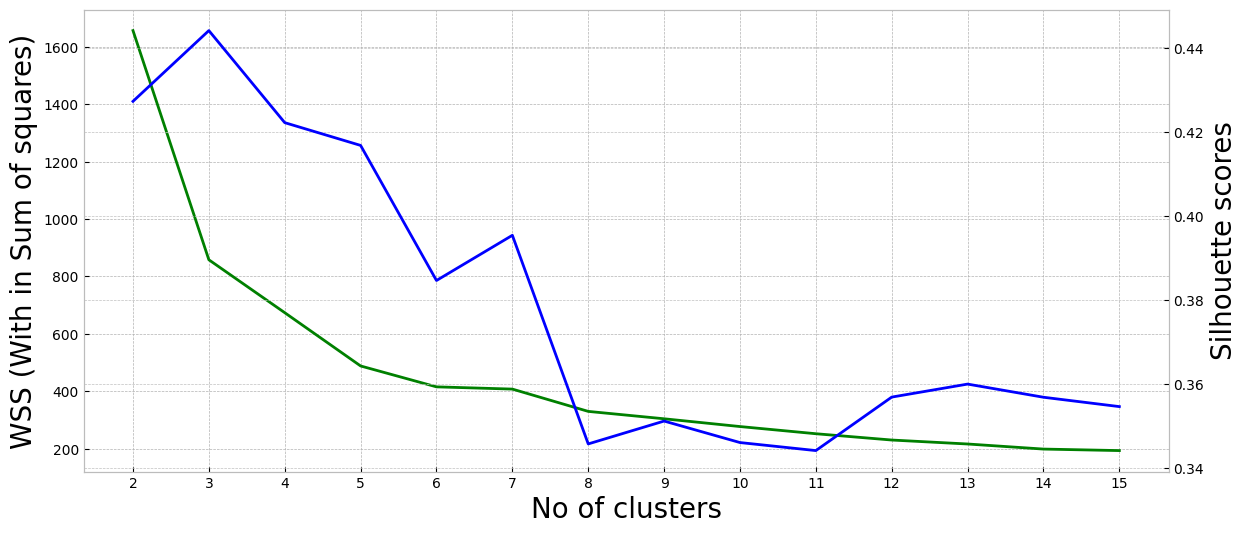

In [71]:
k=range(2,16)
style.use("bmh")
fig,ax=plt.subplots(figsize=(14,6))
ax.set_facecolor("white")
ax.plot(k, wss, color="green")
ax.xaxis.set_major_locator(MaxNLocator(nbins=15, integer=True))
ax.set_xlabel("No of clusters", fontsize=20)
ax.set_ylabel("WSS (With in Sum of squares)", fontsize=20)
ax2=ax.twinx()
ax2.plot(k, sil, color="blue")
ax2.set_ylabel("Silhouette scores", fontsize=20)
ax2.grid(True,color="silver")
plt.show()

#### 3.2 Analyse the plot and get the best elbow value, then create a KMeans cluster with the best value of K [6 Points]

In [ ]:
# <write your code here>
optimal_k = 8

kmeans = KMeans(n_clusters=optimal_k,random_state=42)
kmeans.fit(bmi_charg_c)
labels = Kmeans.labels_



#### 3.3 Based on the obtained centroids from clustering, append a cluster ID to each row in the original raw_data [5 Points]

In [76]:
# <write your code here>
print("Cluster centers (centroids):")
print(kmeans.cluster_centers_)

raw_data["cluster_id"] = Kmeans.labels_
raw_data.head()


Cluster centers (centroids):
[[-0.52678849 -0.55539106]
 [ 0.37527017  1.90878836]
 [ 1.13212033 -0.40089948]
 [ 1.35160502  2.65623391]
 [-0.72981589  0.6980666 ]
 [ 0.26494183 -0.45339709]
 [-1.46355163 -0.4899694 ]
 [ 2.16783222 -0.42436569]]


,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges,bmi_cat,cluster_id
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176,Normal,4
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302,Underweight,5
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538,Overweight,5
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092,Obese,4
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197,Obese,0


#### 3.4 Create a scatter plot of the BMI vs Charges where you color every sample according to the cluster it belongs to [6 Points]

(Hint: Use the scatter function of the matplotlib package for each cluster to plot in different colors.)

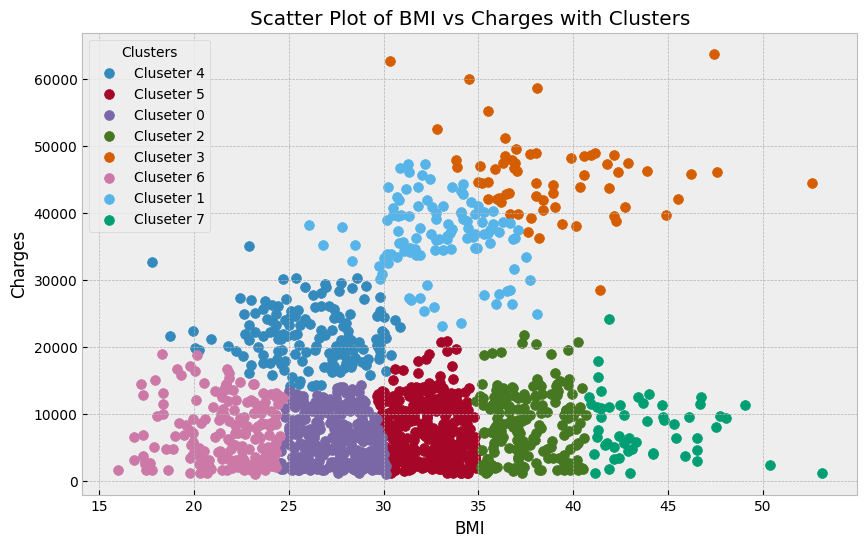

In [80]:
# <write your code here>
plt.figure(figsize=(10,6))

for cluster_id in raw_data["cluster_id"].unique():
    cluster_data = raw_data[raw_data["cluster_id"] == cluster_id]

    plt.scatter(cluster_data["bmi"], cluster_data["charges"], label=f"Cluseter {cluster_id}", s=50)

plt.title("Scatter Plot of BMI vs Charges with Clusters")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend(title="Clusters")
plt.show()

**Interpret the obtained results**

Is there a relation between BMI and Charges?

write your answer here

i can see that some point rise from left to right wich indicates +ve corr

and we hve some constant crowded groups where the charge is the same but the BMI is increasing here we may conclude that there is another variables that are more affecting than BMI

this makes sense as we got 0.20 correlation before  

#### 3.5 Perform prediction for a new data sample [4 Points]

BMI = 38

Charges = 6000.0

In [83]:
new_sample = np.array([[38, 6000.0]])
predicted_cluster = kmeans.predict(new_sample)
print(f"cluster: {predicted_cluster[0]}")


cluster: 3


seems about right according to the pscatter plot

### 4. DBSCAN

Your task in this part of the project is to perform DBSCAN clustering. You can use any method to get the best values of the epsilon and min_samples parameters.

Follow the same steps of KMeans:

1. Obtain a dataframe containing the BMI and Charges
2. Apply DBSCAN on the data [5 Points]
3. Fine tune the hyperparemeters (you might want to use the silhouette score) [12 Points]
4. Plot the data samples, colored by the cluster it belongs to [6 Points]
5. Did you get a better cluster compared to KMeans? [5 Points]
6. Perform the prediction using a new data sample (BMI=38 and Charges=6000) [4 Points]

In [ ]:
bmi_charges_data = raw_data[["bmi", "charges"]]
bmi_charges_data.head


<bound method NDFrame.head of          bmi      charges
0     27.900  16884.92400
1     33.770   1725.55230
2     33.000   4449.46200
3     22.705  21984.47061
4     28.880   3866.85520
...      ...          ...
1333  30.970  10600.54830
1334  31.920   2205.98080
1335  36.850   1629.83350
1336  25.800   2007.94500
1337  29.070  29141.36030

[1338 rows x 2 columns]>

In [165]:
dbscan = DBSCAN(eps=50, min_samples=5)
clusters = dbscan.fit_predict(bmi_charges_data)

bmi_charges_data['cluster_id'] = clusters

bmi_charges_data.head

C:\Users\acer\AppData\Local\Temp\ipykernel_22852\1431881328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_charges_data['cluster_id'] = clusters


<bound method NDFrame.head of          bmi      charges  cluster_id  cluster
0     27.900  16884.92400          -1       -1
1     33.770   1725.55230           0        0
2     33.000   4449.46200           1        1
3     22.705  21984.47061          -1       -1
4     28.880   3866.85520           2        1
...      ...          ...         ...      ...
1333  30.970  10600.54830           9       16
1334  31.920   2205.98080           0        0
1335  36.850   1629.83350           0        0
1336  25.800   2007.94500           0        0
1337  29.070  29141.36030          -1       -1

[1338 rows x 4 columns]>

fine tunning

In [ ]:
eps_values = np.arange(100, 200, 150)
min_samples_values = range(5, 15)
 
best_score = -1
best_eps = 0
best_min_samples = 0

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(bmi_charges_data[['bmi', 'charges']])
        if len(set(clusters)) > 1: 
            score = silhouette_score(bmi_charges_data[['bmi', 'charges']], clusters)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}")

Best eps: 100, Best min_samples: 12


plot 

C:\Users\acer\AppData\Local\Temp\ipykernel_22852\3176269313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_charges_data['cluster'] = clusters


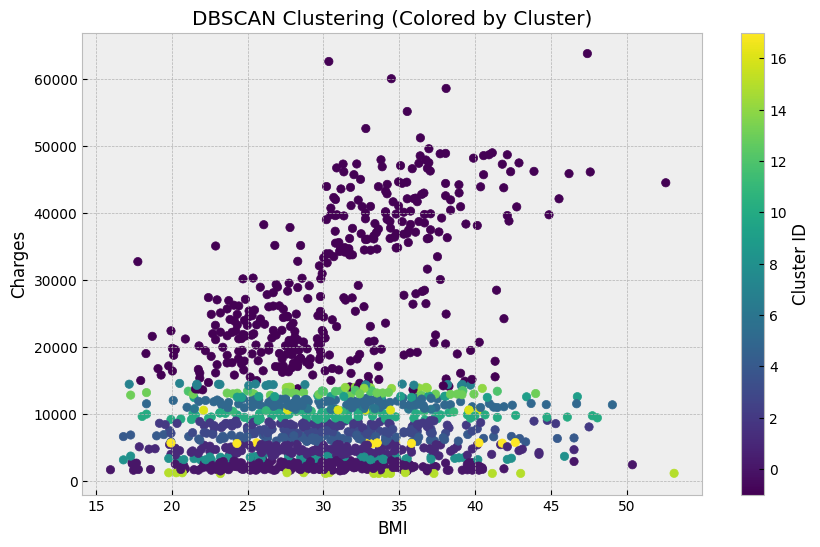

In [162]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(bmi_charges_data[['bmi', 'charges']])
bmi_charges_data['cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(bmi_charges_data['bmi'], bmi_charges_data['charges'], c=bmi_charges_data['cluster'], cmap='viridis')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('DBSCAN Clustering (Colored by Cluster)')
plt.colorbar(label='Cluster ID')
plt.show()

i tried many epsilons but this is the best i got its is very clear that this is not better than kmean as we got so many noise but i dont know if there is something wrong with the code 

In [166]:
new_sample = np.array([[38, 6000]])
scaler = StandardScaler()
new_sample_scaled = scaler.fit_transform(new_sample)
bmi_charges_data_scaled = StandardScaler().fit_transform(bmi_charges_data[['bmi', 'charges']])
dbscan = DBSCAN(eps=100, min_samples=12) 
dbscan.fit(bmi_charges_data_scaled)
new_sample_cluster = dbscan.fit_predict(new_sample_scaled)
print(f"New sample's cluster label: {new_sample_cluster[0]}")

New sample's cluster label: -1


im not sure about this part something is not right with all this noise 